<a href="https://colab.research.google.com/github/daspartho/fastai-part2/blob/main/reverse_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is experimentation regarding the FastAI forum dicussion on using reverse of a prompt.

In [ ]:
!pip install diffusers transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch, logging
from pathlib import Path
from huggingface_hub import notebook_login
from diffusers import StableDiffusionPipeline
from IPython.display import display

logging.disable(logging.WARNING)

if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16).to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
seed=100

In [ ]:
prompt = "an watercolor painting of an astronaut at a beach"

  0%|          | 0/51 [00:00<?, ?it/s]

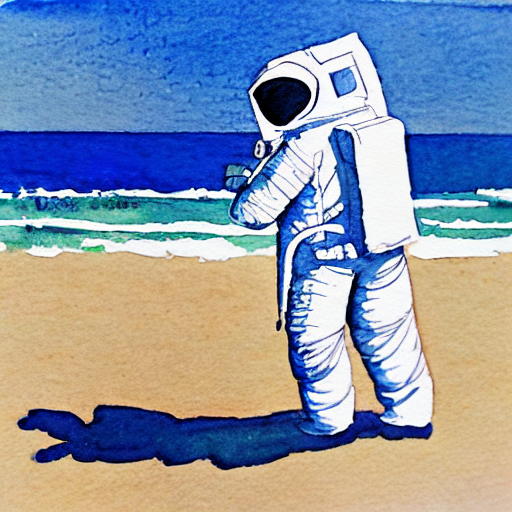

In [ ]:
torch.manual_seed(seed)
pipe(prompt).images[0]

In [ ]:
reversed_prompt=prompt[::-1]
reversed_prompt

'hcaeb a ta tuanortsa na fo gnitniap rolocretaw na'

  0%|          | 0/51 [00:00<?, ?it/s]

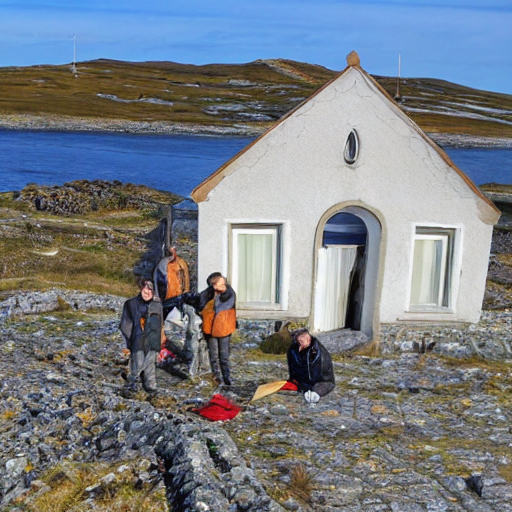

In [ ]:
torch.manual_seed(seed)
pipe(reversed_prompt).images[0]

The reversed prompt being garbled nonsense corresponds to some random image.

  0%|          | 0/51 [00:00<?, ?it/s]

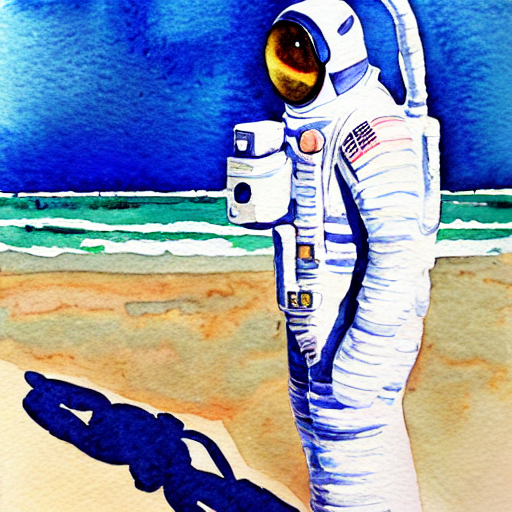

In [ ]:
torch.manual_seed(seed)
pipe(prompt, negative_prompt=reversed_prompt).images[0]

So when the reversed prompt is used as negative prompt, being a random image, it pushes the image generation more towards the given conditional prompt.